In [ ]:
from google.colab import drive

In [ ]:
drive.mount(r'/content/drive')

Mounted at /content/drive


In [ ]:
from gensim.models import KeyedVectors

path = "/content/drive/MyDrive/data/GoogleNews-vectors-negative300.bin"
word_vectors = KeyedVectors.load_word2vec_format(path, binary=True)

vector_us = word_vectors['United_States']

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity(word_vectors['United_States'].reshape(1, -1), word_vectors['U.S.'].reshape(1, -1)).squeeze()

array(0.7310775, dtype=float32)

In [ ]:
word_vectors.most_similar('United_States', topn=10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370987892151),
 ('United_Sates', 0.7400724291801453),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.601906955242157)]

In [ ]:
vector_madrid = word_vectors['Madrid'].reshape(1, -1)
vector_spain = word_vectors['Spain'].reshape(1, -1)
vector_athens = word_vectors['Athens'].reshape(1, -1)

result_vector = vector_madrid - vector_spain + vector_athens
similar_words = word_vectors.similar_by_vector(result_vector.squeeze(), topn=10)

for word, similarity in similar_words:
    print("{}: {:.4f}".format(word, similarity))

Athens: 0.8219
Madrid: 0.5877
Rome: 0.5468
Athens_Greece: 0.5300
Peania: 0.4843
Athen: 0.4821
Mykonos_Island: 0.4807
Cairo: 0.4799
Organizing_Committee_ATHOC: 0.4790
Thessaloniki: 0.4779


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/data/words_dataset.txt', delimiter = ' ', header=None)
df.columns = ['capital_1', 'country_1', 'capital_2', 'country_2']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19557 entries, 0 to 19556
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   capital_1  19557 non-null  object
 1   country_1  19557 non-null  object
 2   capital_2  19544 non-null  object
 3   country_2  19544 non-null  object
dtypes: object(4)
memory usage: 611.3+ KB


In [ ]:
df.dropna(inplace=True)

assert df.isna().sum().sum() == 0

In [ ]:
df.duplicated().sum()

171

In [ ]:
df.drop_duplicates(ignore_index=True, inplace=True)

assert df.duplicated().sum() == 0

In [ ]:
df['capital_1'] = df['capital_1'].str.strip()
df['capital_2'] = df['capital_2'].str.strip()
df['country_1'] = df['country_1'].str.strip()
df['country_2'] = df['country_2'].str.strip()

most_similar_word = []
similarity_score = []

for i, row in df.iterrows():
    vec_word1 = word_vectors[df.loc[i, 'capital_1']].reshape(1, -1)
    vec_word2 = word_vectors[df.loc[i, 'country_1']].reshape(1, -1)
    vec_word3 = word_vectors[df.loc[i, 'capital_2']].reshape(1, -1)
    vec_word4 = word_vectors[df.loc[i, 'country_2']].reshape(1, -1)

    vec_output = vec_word2 - vec_word1 + vec_word3
    word = word_vectors.similar_by_vector(vec_output.squeeze(), topn=1)
    most_similar_word.append(word[0][0])
    similarity_score.append(word[0][1])

df['most_similar_word'] = most_similar_word
df['cosine_similarity'] = similarity_score

df.to_csv('/content/drive/MyDrive/data/result.csv')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/result.csv')

df.head()

,Unnamed: 0.1,Unnamed: 0,capital_1,country_1,capital_2,country_2,most_similar_word,cosine_similarity
0,0,0,Athens,Greece,Baghdad,Iraq,Baghdad,0.748983
1,1,1,Athens,Greece,Bangkok,Thailand,Bangkok,0.743114
2,2,2,Athens,Greece,Beijing,China,China,0.718659
3,3,3,Athens,Greece,Berlin,Germany,Germany,0.672089
4,4,4,Athens,Greece,Bern,Switzerland,Bern,0.690234


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(df['most_similar_word'], df['country_2'])

0.20084653899757393

In [ ]:
path1 = '/content/drive/MyDrive/data/set1.csv'
path2 = '/content/drive/MyDrive/data/set2.csv'

df1 = pd.read_csv(path1, usecols=['Word 1', 'Word 2', 'Human (mean)'])
df2 = pd.read_csv(path2, usecols=['Word 1', 'Word 2', 'Human (mean)'])

In [ ]:
print(df1.isna().sum().sum())
print(df1.duplicated().sum())

0
0


In [ ]:
print(df2.isna().sum().sum())
print(df2.duplicated().sum())

0
0


In [ ]:
df1.append(df2)

stacked_df = pd.concat([df1, df2], axis=0)

stacked_df.shape

<ipython-input-31-5b81f9a332ef>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1.append(df2)


(353, 3)

In [ ]:
stacked_df.duplicated().sum()

0

In [ ]:
similar_scores = []
for i, row in stacked_df.iterrows():
    word1 = stacked_df.loc[i, 'Word 1']
    word2 = stacked_df.loc[i, 'Word 2']
    word1_vec = word_vectors[word1].reshape(1, -1)
    word2_vec = word_vectors[word2].reshape(1, -1)
    similarity = cosine_similarity(word1_vec, word2_vec).squeeze()
    similar_scores.append(similarity)

stacked_df['cosine_similarity'] = similar_scores

In [ ]:
from scipy.stats import spearmanr

spearmanr(stacked_df['cosine_similarity'], stacked_df['Human (mean)'])

SignificanceResult(statistic=0.4574608339616398, pvalue=1.169510412160074e-19)

In [ ]:
country_names = ["Afghanistan", 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
                 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
                 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
                 'Canada', 'Central African Republic (CAR)', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo,Democratic Republic of the'
                 'Congo,Republic of the', 'Costa Rica', 'Cote d’Ivoire', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica',
                 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland',
                 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana',
                 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan',
                 'Kazakhstan', 'Kenya', 'Kiribati', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein',
                 'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Mauritania', 'Mauritius', 'Mexico',
                 'Micronesia', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands',
                 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'North Korea', 'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Palestine', 'Panama',
                 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Rwanda', 'Saint Kitts and Nevis',
                 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia',
                 'Seychelles', 'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'South Korea', 'South Sudan',
                 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Syria', 'Taiwan', 'Tajikistan', 'Tanzania', 'Thailand', 'Timor-Leste',
                 'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates (UAE)',
                 'United Kingdom (UK)', 'United States of America (USA)', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Vatican City (Holy See)', 'Venezuela',
                 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe']

len(country_names)

196

In [ ]:
country_names = [country for country in country_names if country in word_vectors.index_to_key]

len(country_names)

160

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0)
country_names_vector = [word_vectors[word] for word in country_names]

kmeans.fit(country_names_vector)

clusters = kmeans.cluster_centers_
print(kmeans.inertia_)
print(kmeans.n_iter_)

900.098928590587
6


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
labels = list(kmeans.labels_)
for i in range(5):
    print(f"Cluster {i + 1}")
    cluster_country = [country_names[j] for j in range(len(country_names)) if labels[j] == i]
    print(cluster_country)
    print()

Cluster 1
['Afghanistan', 'Albania', 'Armenia', 'Azerbaijan', 'Belarus', 'Bulgaria', 'Cyprus', 'Czechia', 'Egypt', 'Georgia', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kazakhstan', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Lebanon', 'Libya', 'Moldova', 'Pakistan', 'Palestine', 'Russia', 'Serbia', 'Syria', 'Tajikistan', 'Turkey', 'Turkmenistan', 'Ukraine', 'Uzbekistan']

Cluster 2
['Australia', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Fiji', 'India', 'Indonesia', 'Japan', 'Kiribati', 'Laos', 'Malaysia', 'Maldives', 'Mauritius', 'Micronesia', 'Mongolia', 'Myanmar', 'Nauru', 'Nepal', 'Oman', 'Palau', 'Philippines', 'Qatar', 'Samoa', 'Singapore', 'Taiwan', 'Thailand', 'Tonga', 'Tuvalu', 'Vanuatu', 'Vietnam']

Cluster 3
['Argentina', 'Bahamas', 'Barbados', 'Belize', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Cuba', 'Dominica', 'Ecuador', 'Grenada', 'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Suriname', 'Uruguay',

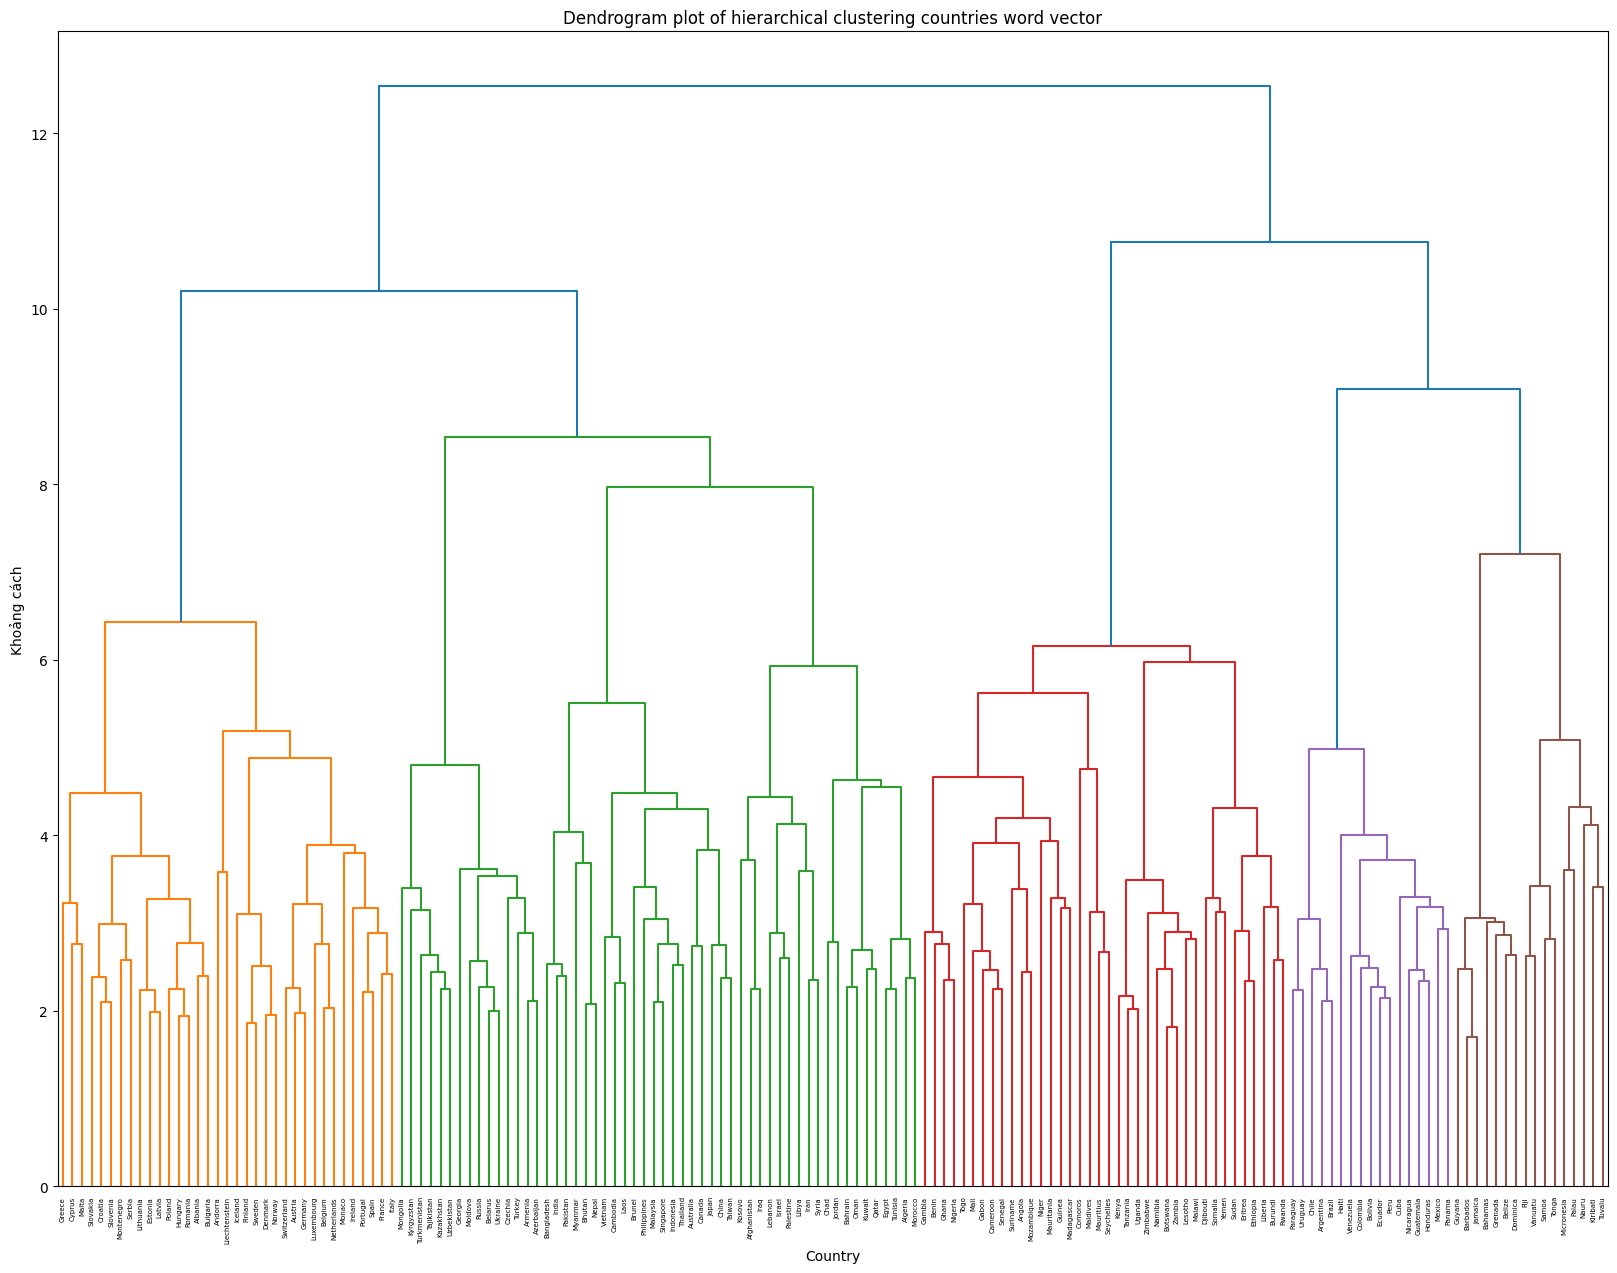

In [ ]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import ward, dendrogram
import matplotlib.pyplot as plt

country_names_vector = [word_vectors[word] for word in country_names]
distance_matrix = pdist(country_names_vector)
linkage_matrix = ward(distance_matrix)

plt.figure(figsize=(20, 15))
dendrogram(linkage_matrix, labels=country_names, leaf_rotation=90)
plt.title("Dendrogram plot of hierarchical clustering countries word vector")
plt.xlabel('Country')
plt.ylabel('Khoảng cách')
plt.show()


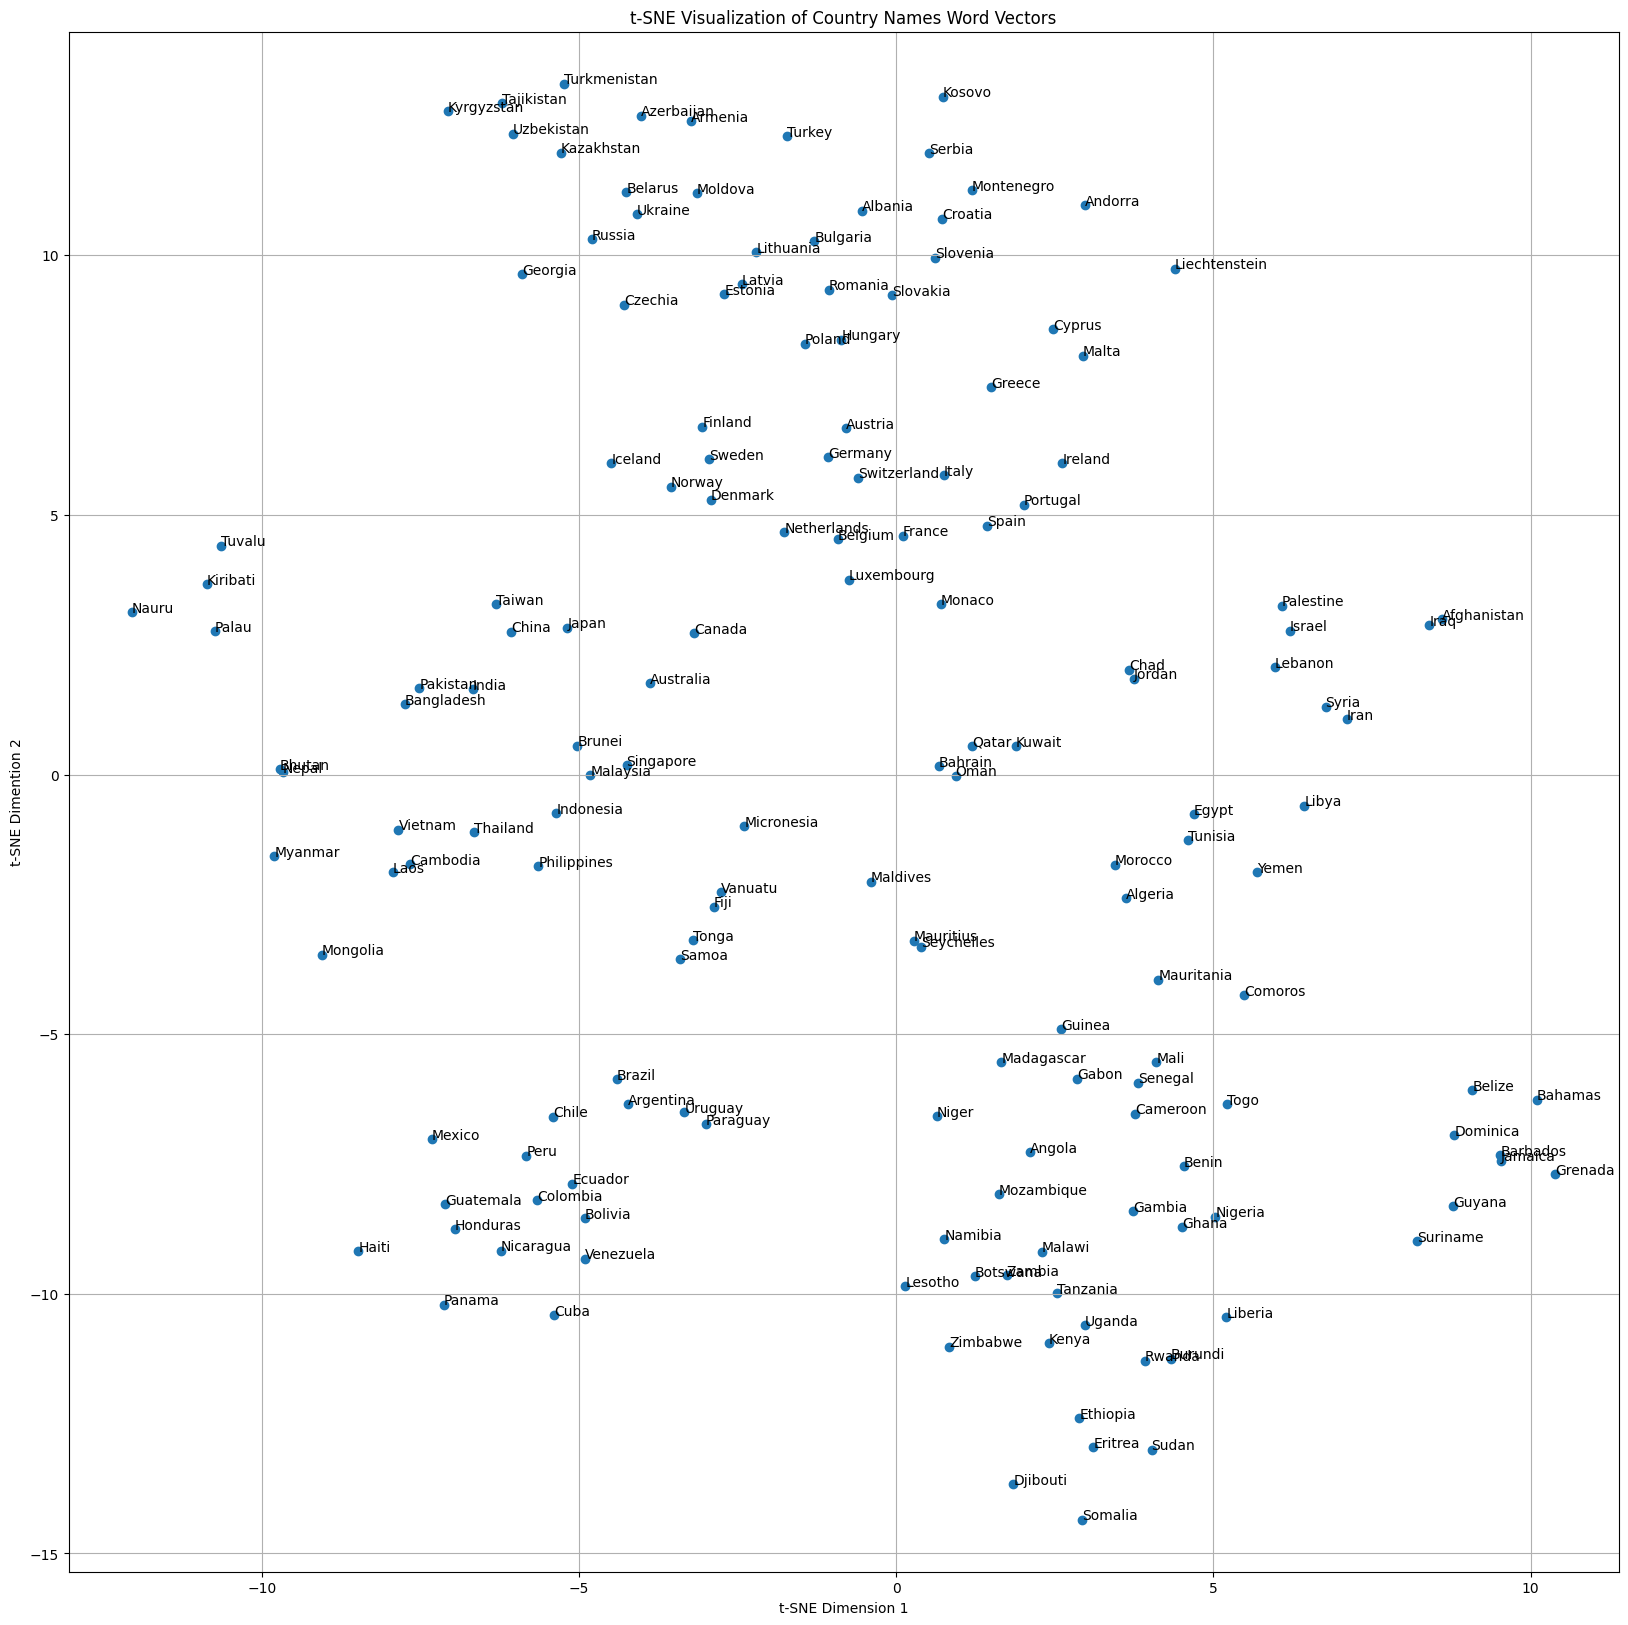

In [ ]:
from sklearn.manifold import TSNE
import numpy as np

t_sne = TSNE(n_components=2, random_state=45)
country_names_tsne = t_sne.fit_transform(np.array(country_names_vector))

plt.figure(figsize=(20, 20))
plt.scatter(country_names_tsne[:, 0], country_names_tsne[:, 1])

for i, country in enumerate(country_names):
    plt.annotate(country, (country_names_tsne[i, 0], country_names_tsne[i, 1]))

plt.title('t-SNE Visualization of Country Names Word Vectors')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimention 2')
plt.grid(True)

plt.xlim(country_names_tsne[:, 0].min() - 1, country_names_tsne[:, 0].max() + 1)
plt.ylim(country_names_tsne[:, 1].min() - 1, country_names_tsne[:, 1].max() + 1)

plt.show()